In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
csv_path = '../data/01_raw/diabetes_data_upload.csv'


In [38]:
df = pd.read_csv(csv_path)

In [39]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [40]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [41]:
sns.set(style='white')

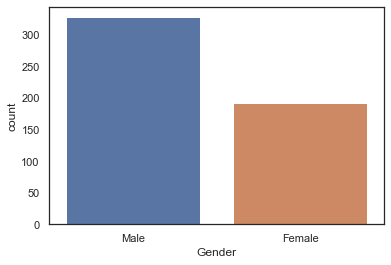

In [42]:
sns.countplot(x=df['Gender'])

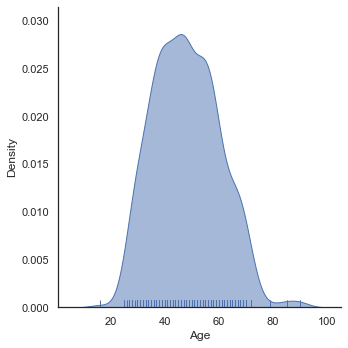

In [43]:
sns.displot(df['Age'], rug=True, kind='kde', fill=True, alpha=0.5, palette='bright')

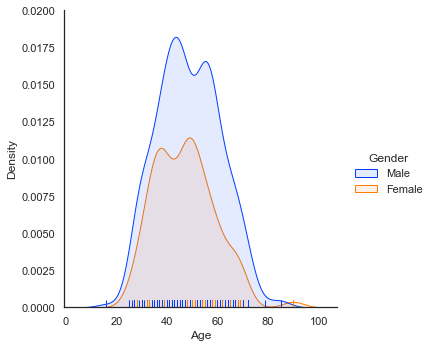

In [44]:
cols = df.columns.tolist()
genders = df['Gender'].unique()

sns.displot(x=df['Age'], hue=df['Gender'], kind='kde', fill=True, palette='bright', alpha=.1, rug=True)

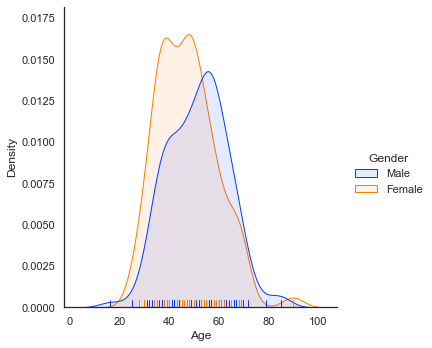

In [45]:
# Isolate positive for diabetes
positive_df = df.loc[df['class'] == 'Positive']

sns.displot(x=positive_df['Age'], kind='kde', fill=True, hue=positive_df['Gender'], alpha=.1, palette='bright', rug=True)

In [46]:
# Get a count of positive for each categorical variable

In [47]:
total_cols = df.columns.tolist()
total_cols.remove('Age')
total_cols.remove('Gender')


In [48]:
def convert_to_bool(value_in):
    bool_val = None
    if str(value_in) == 'Yes':
        bool_val = True
    elif str(value_in) == 'No':
        bool_val = False
    return bool_val
    

In [208]:
df_cols = df.columns.tolist()
df_cols.remove('Age')
df_cols.remove('class')
df_cols.remove('Gender')
bool_df = df.copy()
for col in df_cols:
    bool_df[col] = bool_df[col].apply(convert_to_bool)
bool_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,False,True,False,True,False,False,False,True,False,True,False,True,True,True,Positive
1,58,Male,False,False,False,True,False,False,True,False,False,False,True,False,True,False,Positive
2,41,Male,True,False,False,True,True,False,False,True,False,True,False,True,True,False,Positive
3,45,Male,False,False,True,True,True,True,False,True,False,True,False,False,False,False,Positive
4,60,Male,True,True,True,True,True,False,True,True,True,True,True,True,True,True,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,True,True,True,False,True,False,False,True,False,True,True,False,False,False,Positive
516,48,Female,True,True,True,True,True,False,False,True,True,True,True,False,False,False,Positive
517,58,Female,True,True,True,True,True,False,True,False,False,False,True,True,False,True,Positive
518,32,Female,False,False,False,True,False,False,True,True,False,True,False,False,True,False,Negative


In [207]:
df.head().reset_index()

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [218]:
sum_df = bool_df.copy()
sum_df = sum_df.drop('Age', axis=1)
sum_df = sum_df.groupby(['class']).sum().reset_index()
sum_df = sum_df.melt(id_vars=['class'], var_name="symptom", 
        value_name="Value")

sum_df = sum_df.sort_values(by=['Value'], ascending=False)
sum_df_pos = sum_df.loc[sum_df['class'] == 'Positive']
sum_df_neg = sum_df.loc[sum_df['class'] == 'Negative']
sum_df

,class,symptom,Value
1,Positive,Polyuria,243.0
3,Positive,Polydipsia,225.0
7,Positive,weakness,218.0
21,Positive,partial paresis,192.0
9,Positive,Polyphagia,189.0
5,Positive,sudden weight loss,188.0
13,Positive,visual blurring,175.0
15,Positive,Itching,154.0
19,Positive,delayed healing,153.0
23,Positive,muscle stiffness,135.0


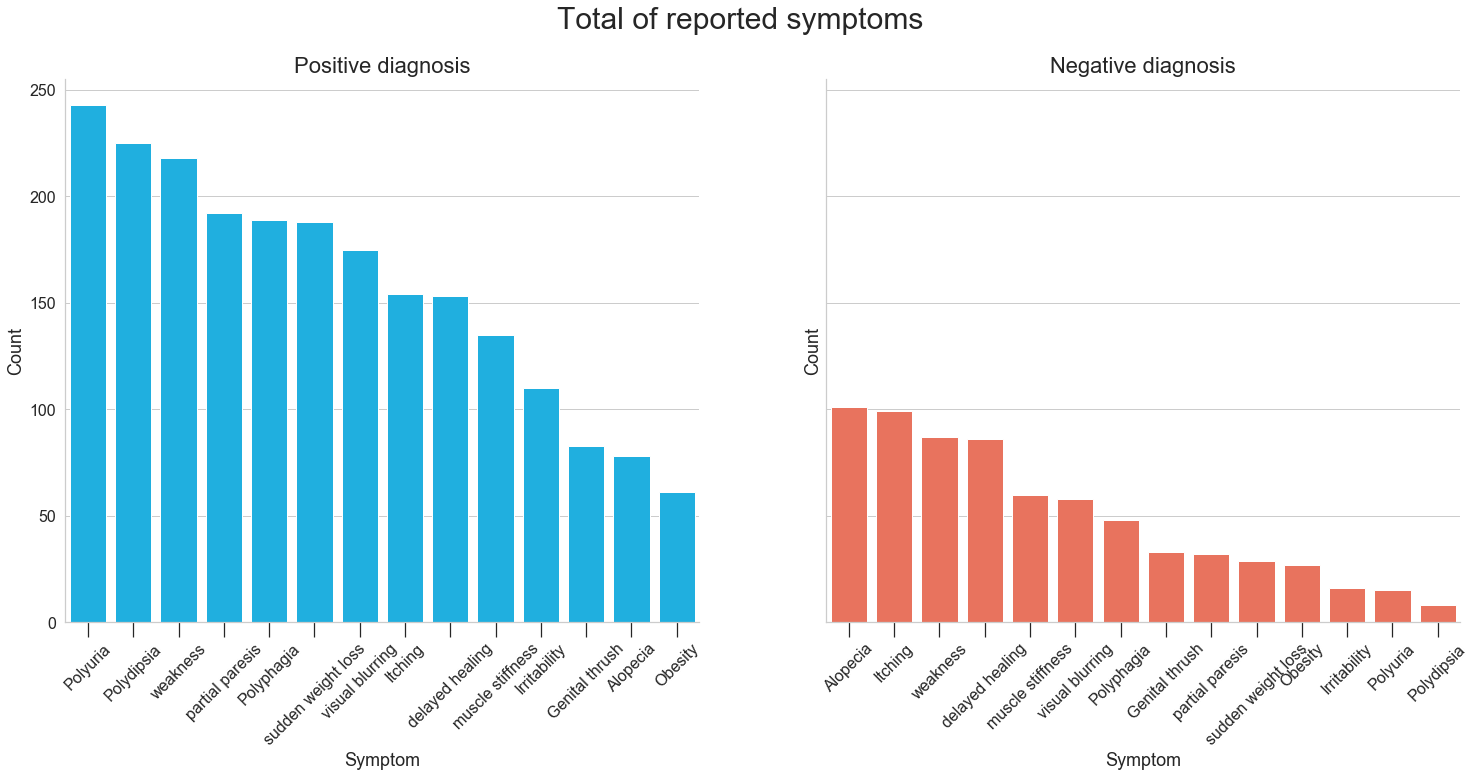

In [290]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(25,10), sharey=True)
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

sns.barplot(data=sum_df_pos, x='symptom', y='Value', color='deepskyblue', ci=False, ax=axes[0])
sns.barplot(data=sum_df_neg, x='symptom', y='Value', color='tomato', ci=False, ax=axes[1])

title_list = ['Positive', 'Negative']

for x, ax in enumerate(axes):
    
    axes[x].set_xlabel("Symptom", fontsize=18)
    axes[x].set_ylabel("Count",fontsize=18)
    axes[x].tick_params(labelsize=16)
    axes[x].set_title(f'{title_list[x]} diagnosis', size=22)
    axes[x].tick_params('x', labelrotation=90, left=True, bottom=True, length=15)
    axes[x].tick_params('x', labelrotation=45)
    
fig.suptitle('Total of reported symptoms', size=30)
sns.despine()




In [71]:
grouped_df = bool_df.copy()
grouped_df = grouped_df.drop('Age', axis=1)
grouped_df = grouped_df.groupby(['Gender', 'class']).sum().reset_index()
grouped_df

,Gender,class,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Female,Negative,0.0,0.0,1.0,11.0,1.0,4.0,8.0,13.0,1.0,13.0,2.0,3.0,13.0,3.0
1,Female,Positive,129.0,125.0,114.0,117.0,114.0,17.0,104.0,87.0,47.0,88.0,122.0,80.0,14.0,30.0
2,Male,Negative,15.0,8.0,28.0,76.0,47.0,29.0,50.0,86.0,15.0,73.0,30.0,57.0,88.0,24.0
3,Male,Positive,114.0,100.0,74.0,101.0,75.0,66.0,71.0,67.0,63.0,65.0,70.0,55.0,64.0,31.0


In [205]:
melt_df = grouped_df.copy()
melt_df = melt_df.melt(id_vars=["Gender", "class"], 
        var_name="symptom", 
        value_name="Value")

melt_df = melt_df.sort_values(by=['Value', 'class'], ascending=False)
print(melt_df.head(15))

    Gender     class             symptom  Value
1   Female  Positive            Polyuria  129.0
5   Female  Positive          Polydipsia  125.0
41  Female  Positive     partial paresis  122.0
13  Female  Positive            weakness  117.0
3     Male  Positive            Polyuria  114.0
9   Female  Positive  sudden weight loss  114.0
17  Female  Positive          Polyphagia  114.0
25  Female  Positive     visual blurring  104.0
15    Male  Positive            weakness  101.0
7     Male  Positive          Polydipsia  100.0
37  Female  Positive     delayed healing   88.0
50    Male  Negative            Alopecia   88.0
29  Female  Positive             Itching   87.0
30    Male  Negative             Itching   86.0
45  Female  Positive    muscle stiffness   80.0


Text(0.5, 1.0, 'Most common symptoms by gender')

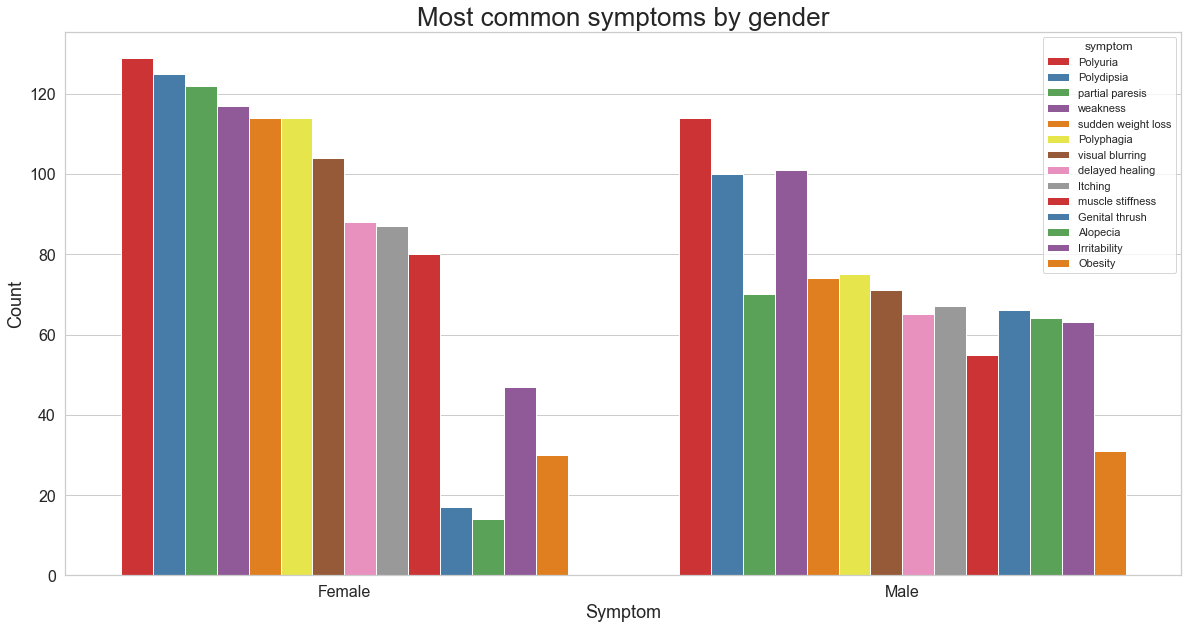

In [193]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(1,1, figsize=(20,10))
# Combined genders
c_palette = sns.color_palette('husl', 15)
# sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)
pos = melt_df.loc[melt_df['class'] == 'Positive']
pos = pos.sort_values(by=['Value'], ascending=False)
sns.barplot(data=pos, x='Gender', y='Value', hue='symptom', palette='Set1', ci=False, ax=ax)
ax.set_xlabel("Symptom", fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
plt.xticks(rotation=0)                                                               


plt.title("Most common symptoms by gender", size=26)

In [ ]:
gender_dfs = [melt_df.loc[melt_df['Gender'] == gender] for gender in genders]
# Combined genders
sns.catplot(data=melt_df, x='class', y='Value', hue='symptom', kind='bar', palette='Set1', ci=False)

4
   Gender     class
0  Female  Negative
1  Female  Positive
2    Male  Negative
3    Male  Positive


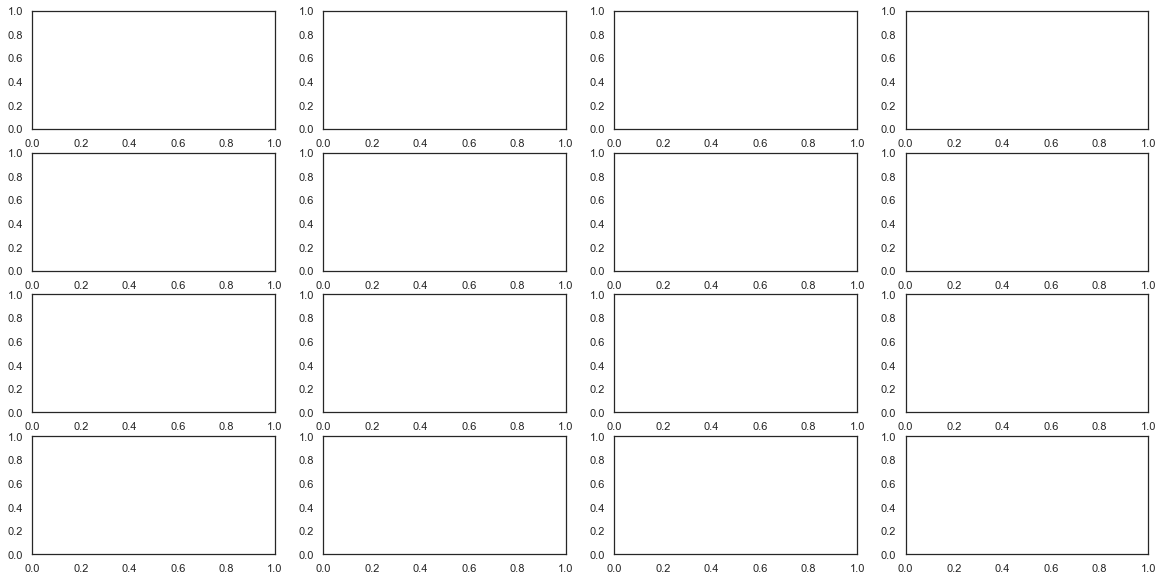

In [56]:
# Create grid
from math import ceil

len_total_cols = (len(total_cols))
cols_per_row = 4
num_rows = ceil(len_total_cols / cols_per_row)
print(num_rows)
fig, ax = plt.subplots(num_rows,cols_per_row, figsize=(20,10))
